In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
import numpy as np

from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import peakidentify
from ramandecompy import spectrafit

In [2]:
dataprep.new_hdf5('dataplot_390')

OSError: Unable to create file (unable to open file: name = 'dataplot_390.hdf5', errno = 17, error message = 'File exists', flags = 15, o_flags = a02)

In [ ]:
# dataprep.add_experiment('dataplot_390.hdf5', '../ramandecompy/tests/test_files/FA_3.6wt%_390C_10s.csv')
# dataprep.add_experiment('dataplot_390.hdf5', '../ramandecompy/tests/test_files/FA_3.6wt%_390C_15s.csv')
# dataprep.add_experiment('dataplot_390.hdf5', '../ramandecompy/tests/test_files/FA_3.6wt%_390C_20s.csv')
# dataprep.add_experiment('dataplot_390.hdf5', '../ramandecompy/tests/test_files/FA_3.6wt%_390C_25s.csv')
# dataprep.add_experiment('dataplot_390.hdf5', '../ramandecompy/tests/test_files/FA_3.6wt%_390C_30s.csv')
dataprep.view_hdf5('dataplot_390.hdf5')

In [ ]:
%matplotlib inline
spectrafit.superimpose_set('dataplot_390.hdf5', '390C/10s')

In [ ]:
%matplotlib inline
dataprep.adjust_peaks('dataplot_390.hdf5', '390C/10s', [1055, 1285, 1355, 1402], plot_fits=True)
# [1055, 1355, 1402]

In [ ]:
%matplotlib inline
fig, ax1, ax2 = datavis.plot_fit('dataplot_390.hdf5', '390C/10s')

In [3]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

def polygon_under_graph(xlist, ylist):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    """
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]

def plot_temp(hdf5_filename, temp):
    """
    docstring
    """
    # open hdf5_file
    hdf5 = h5py.File(hdf5_filename, 'r')
    # intialize 3D plot
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(111, projection='3d')
    # plot raw spectra data from hdf5 file
    y_ticks = []
    for _, time in enumerate(list(hdf5['{}C'.format(temp)].keys())):
        x_data = list(hdf5['{}C/{}/wavenumber'.format(temp, time)])
        y_data = list(hdf5['{}C/{}/counts'.format(temp, time)]) 
        ax.plot(x_data, y_data, zs=int(time[:-1]), zdir='y', c='blue', linewidth=0.75, alpha=0.7)
        y_ticks.append(int(time[:-1]))
    # assign orientation and labels
    ax.view_init(19, -96)
    ax.set_xlabel('Wavenumber ($cm^{-1}$)', fontsize=8, labelpad=20)
    ax.set_xlim(min(x_data), max(x_data))
    ax.set_ylabel('Residence Time (s)', fontsize=8, labelpad=10)
    ax.set_zlabel('Intensity (arb. units)', fontsize=8, labelpad=10)
    plt.tick_params(labelsize=6)
    ax.set_yticks(y_ticks)
    # create a title
    ax.set_title('Spectra @ {}C'.format(temp), fontsize=14)
    hdf5.close()
    return fig, ax
    
def plot_3D_component(ax, hdf5_filename, temp, peak_number):
    """
    docstring
    """
    # open hdf5_file
    hdf5 = h5py.File(hdf5_filename, 'r')
    # plot pseudo-voigt profiles
    for _, time in enumerate(list(hdf5['{}C'.format(temp)].keys())):
        key = '{}C/{}'.format(temp, time)
        # extract wavenumber data
        x_data = list(hdf5[key+'/wavenumber'])
        peak_list = list(hdf5[key].keys())
        peak_name = peak_list[peak_number-1]
        # extract pseudo voigt parameters
        peak_params = list(hdf5['{}/{}'.format(key, peak_name)][0])
        fraction, sigma, center, amplitude = peak_params[0:4]
        # calculate pseudo voigt distribution from peak_params
        y_data = datavis.pseudo_voigt(x_data, amplitude, center, sigma, fraction)
        # assign verticies for polygon to represent area under curve
        verts = []
        verts.append(polygon_under_graph(x_data, y_data))
        # plot polygons
        poly = PolyCollection(verts, facecolors='r', alpha=.6)
        ax.add_collection3d(poly, zs=int(time[:-1]), zdir='y')
    # apply title
    if peak_number < 10:
        ax.set_title('Pseudo-Voigt profiles for Peak_0{} @ {}C'.format(peak_number, temp),
                     fontsize=14, pad=35)
    else:
        ax.set_title('Pseudo-Voigt profiles for Peak_{} @ {}C'.format(peak_number, temp),
                     fontsize=14, pad=35)    
    # close hdf5 file
    hdf5.close()
    return

In [ ]:
%matplotlib notebook

hdf5_filename = 'spectrafit_dev3.hdf5'
temp = 300
peak_number = 9

fig, ax = plot_temp(hdf5_filename, temp)
plot_3D_component(ax, hdf5_filename, temp, peak_number)
plot_3D_component(ax, hdf5_filename, temp, 10)
ax.set_title('Pseudo-Voigt Profiles for CO$_{2}$ @ 300C', fontsize=14, pad=35)

<IPython.core.display.Javascript object>


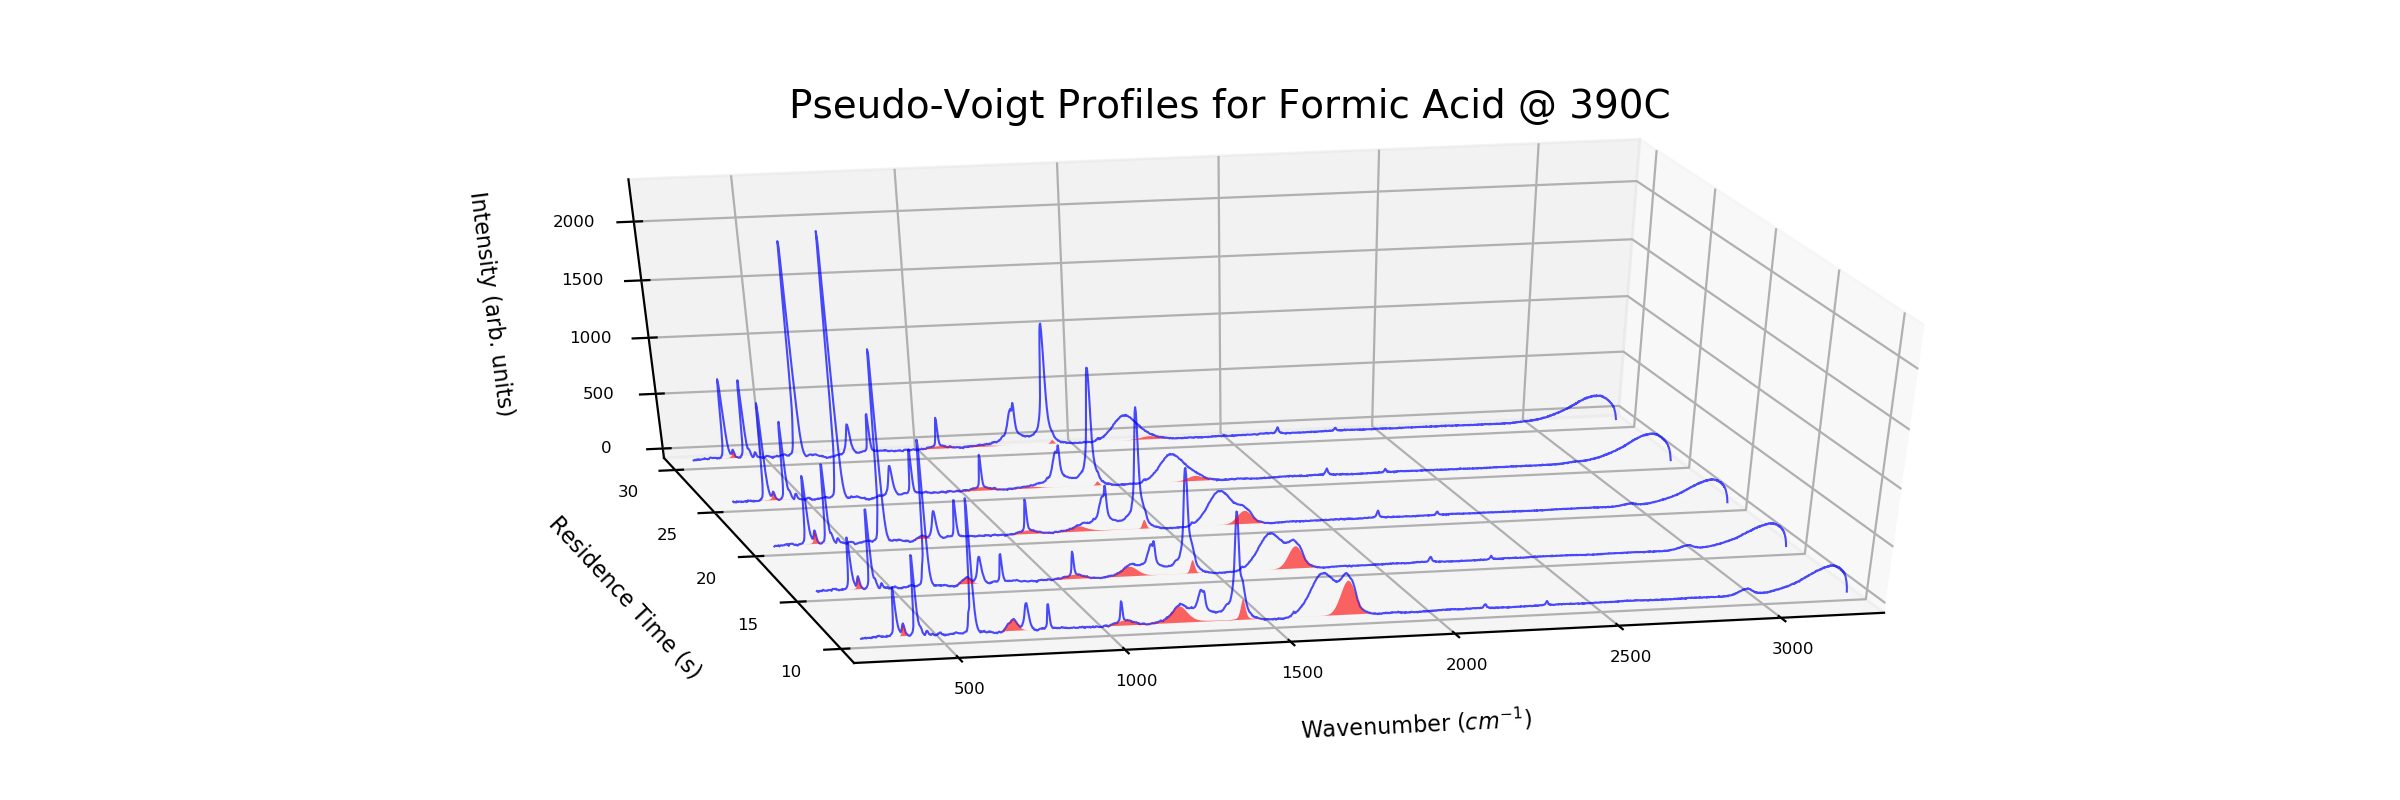

Text(0.5, 0.5132188731375618, 'Pseudo-Voigt Profiles for Formic Acid @ 390C')

In [5]:
%matplotlib notebook

hdf5_filename = 'dataplot_390.hdf5'
temp = 390


fig, ax = plot_temp(hdf5_filename, temp)
plot_3D_component(ax, hdf5_filename, temp, 6)
plot_3D_component(ax, hdf5_filename, temp, 10)
plot_3D_component(ax, hdf5_filename, temp, 11)
plot_3D_component(ax, hdf5_filename, temp, 16)
plot_3D_component(ax, hdf5_filename, temp, 18)
plot_3D_component(ax, hdf5_filename, temp, 21)
ax.set_title('Pseudo-Voigt Profiles for Formic Acid @ 390C', fontsize=14, pad=100)

# plt.savefig('3D_formicAcid_390C', dpi=300, bbox_inches='tight', pad_inches=0.3)

In [ ]:
from shutil import copyfile
# create a copy of test_experiment.hdf5
copyfile('../ramandecompy/tests/test_files/test_experiment.hdf5', '3Dplotting.hdf5')

In [ ]:
dataprep.view_hdf5('3Dplotting.hdf5')

In [ ]:
# peakidentify.peak_assignment('3Dplotting.hdf5', '300C/25s', '../ramandecompy/tests/test_files/test_calibration.hdf5', 10)

In [ ]:
# used to made datavis_example_data

# dataprep.new_hdf5('../ramandecompy/tests/test_files/datavis_example_data')
# dataprep.add_experiment('../ramandecompy/tests/test_files/datavis_example_data.hdf5',
#                         '../ramandecompy/tests/test_files/FA_3.6wt%_390C_10s.csv')
# dataprep.add_experiment('../ramandecompy/tests/test_files/datavis_example_data.hdf5',
#                         '../ramandecompy/tests/test_files/FA_3.6wt%_390C_15s.csv')
# dataprep.add_experiment('../ramandecompy/tests/test_files/datavis_example_data.hdf5',
#                         '../ramandecompy/tests/test_files/FA_3.6wt%_390C_20s.csv')
# dataprep.add_experiment('../ramandecompy/tests/test_files/datavis_example_data.hdf5',
#                         '../ramandecompy/tests/test_files/FA_3.6wt%_390C_25s.csv')
# dataprep.add_experiment('../ramandecompy/tests/test_files/datavis_example_data.hdf5',
#                         '../ramandecompy/tests/test_files/FA_3.6wt%_390C_30s.csv')
# dataprep.view_hdf5('../ramandecompy/tests/test_files/datavis_example_data.hdf5')


# dataprep.adjust_peaks('../ramandecompy/tests/test_files/datavis_example_data.hdf5',
#                       '390C/10s', [1055, 1285, 1355, 1402], plot_fits=True)
# # [1055, 1355, 1402]


# from ramandecompy import spectrafit
# spectrafit.superimpose_set('../ramandecompy